We set up a test problem with velocity $c=2$ and periodic end conditions. 

In [1]:
include("../FNC.jl")
x,Dx = FNC.diffper(400,[0 1])
uinit = @. exp(-80*(x-0.5)^2);

For this problem we use `RK4`, an explicit method. 

In [2]:
ode = (u,c,t) -> -c*(Dx*u);
using DifferentialEquations
IVP = ODEProblem(ode,uinit,(0.,2.),2.)
sol = solve(IVP,RK4());

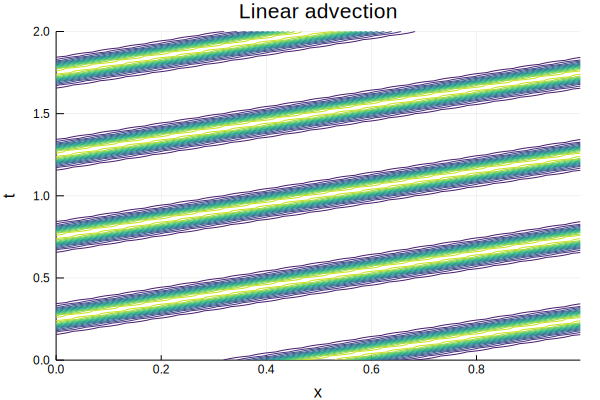

In [3]:
using Plots
t = 2*(0:80)/80
u = hcat([sol(t) for t in t]...)
contour(x,t,u',color=:viridis,
    xaxis=("x"),yaxis=("t"),title="Linear advection",leg=:none)

You can see the hump traveling rightward at constant speed, traversing the domain once for each integer multiple of $t=1/2$. We note the average time step that was chosen:

In [4]:
avgtau1 = sum(diff(sol.t))/(length(sol.t)-1)

0.0035460992907801418

We cut $h$ by a factor of two and solve again.

In [5]:
x,Dx = FNC.diffper(800,[0 1])
uinit = @. exp(-80*(x-0.5)^2);
IVP = ODEProblem(ode,uinit,(0.,2.),2.)
sol = solve(IVP,RK4());

The CFL condition suggests that the time step should be cut by a factor of two also.

In [6]:
avgtau2 = sum(diff(sol.t))/(length(sol.t)-1)
@show ratio = avgtau1 / avgtau2

ratio = avgtau1 / avgtau2 = 1.9982269503546097


1.9982269503546097